In [1]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [32]:
box = simpleBox(mode="alternative",length=1000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
all_rats = []
solvers = {}
rats = {}
ratname = 'VirtualRat'
print ratname
model = SimplePolicyNetwork(hidden_dim=2,reg=0, noise_factor = 0)
rat = SimRat(model)
box = simpleBox(mode="alternative",length=10000,block_size=30,random_range=0,
                trial_per_episode=10, repeat = True, reward_ratio = 1, p2a = 0.5, correction = True)
solver = SimpleRLPolicyGradientSolver(model, box,
                                    update_rule='adam',
                                    optim_config={
                                        'learning_rate': 8e-3,
                                        'decay_rate': 1
                                    },
                                    init_rule='xavier',
                                    num_episodes=1501,
                                    verbose=False,
                                    supervised = True,
                                    stop = True,
                                    print_every=50)
#solver.load_params(loaded_params)
solver.init()
solver.set_temperature(5.0)
rats[ratname] = rat

solver.train()


VirtualRat
Episode 50 complete (0.03s), loss: 90.9668352175, reward: -6, running reward: -3.55655126773
Episode 100 complete (0.03s), loss: 92.7441110172, reward: -6, running reward: -2.20074243337
Episode 150 complete (0.03s), loss: 57.408726467, reward: 4, running reward: 0.318660985785
Episode 200 complete (0.03s), loss: 85.2982621768, reward: -2, running reward: -0.132665562873
Episode 250 complete (0.03s), loss: 79.206554932, reward: 0, running reward: -0.705035489375
Episode 300 complete (0.03s), loss: 61.2462029588, reward: 2, running reward: 0.394424964513
Episode 350 complete (0.02s), loss: 60.3003514338, reward: 0, running reward: 2.04298228784
Episode 400 complete (0.03s), loss: 19.7507240584, reward: 8, running reward: 5.67373351956


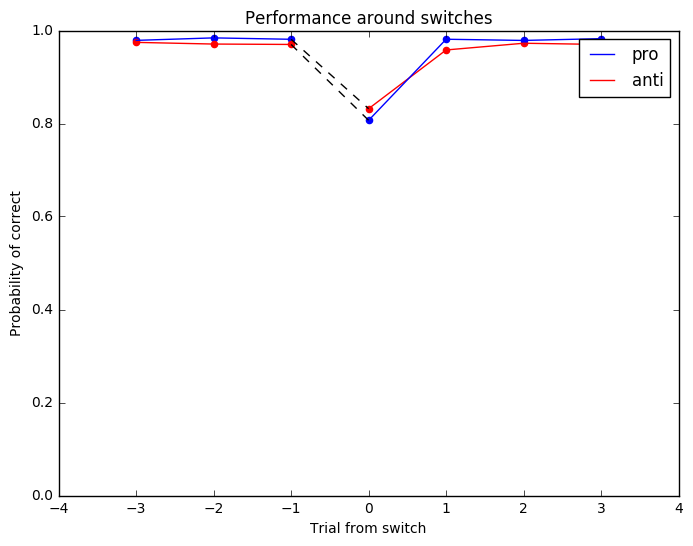

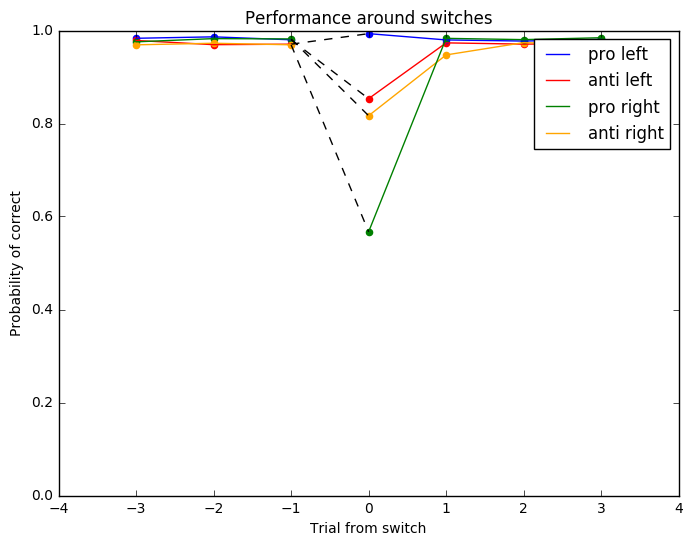

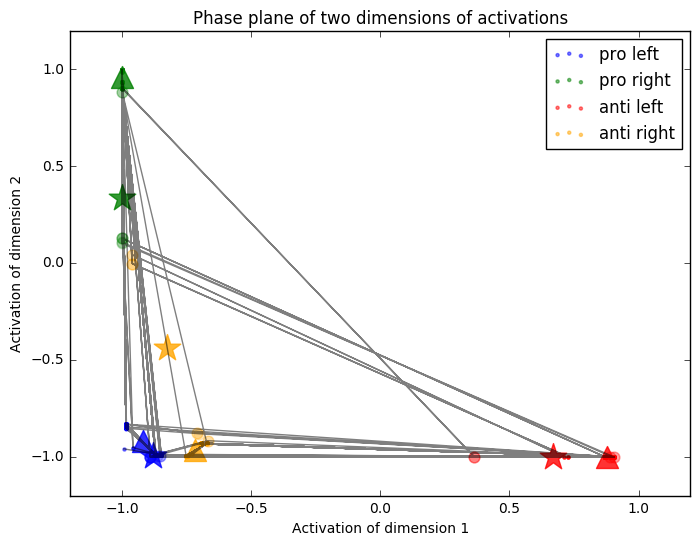

In [86]:
probs = rat.predict(val_X,val_y)
trial_window = 3
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)
draw_3d_new(rat.p2a_left_prob, rat.p2a_right_prob, rat.a2p_left_prob, rat.a2p_right_prob, trial_window = 3)
#parallel_coordinate(model.activation_history.asnumpy(), start = 0, end = 1000)
phasePlane(model.activation_history.asnumpy(), trajectory = True, mean=True)
solvers[ratname] = solver
rat.addHistory(box.output_history())
rat.computeLearningCurve()

In [39]:
weights = solver.save_params()

In [42]:
weights

{'Wa': array([[-2.55,  0.84,  0.79],
        [-1.95,  1.41,  2.31]]), 'Wh': array([[-0.1 , -0.78],
        [-0.6 ,  0.76]]), 'Wx': array([[-2.25,  1.22],
        [ 0.5 , -1.84],
        [ 1.15, -2.61],
        [-1.15,  1.7 ],
        [-0.85,  0.8 ]]), 'b': array([-0.84, -1.35]), 'ba': array([ 0.12,  2.86, -2.25]), 'temperature': 0.71996662768219144}

In [65]:
xx = np.dot(val_X[0,30,:], weights["Wx"])
print xx

[ 1.66 -4.45]


In [74]:
h

array([ 0.9, -1. ])

In [64]:
hh = np.dot(model.activation_history.asnumpy()[29,0,:2], weights["Wh"])
print hh

[ 0.68 -0.08]


In [75]:
score = np.dot(h,weights["Wa"]) + weights["ba"]
print score

[-0.24  2.22 -3.85]


In [76]:
def softmax(x,temp):
    """Compute softmax values for each sets of scores in x."""
    x /= temp
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
p = softmax(score,weights["temperature"])
print p

[  3.20e-02   9.68e-01   2.12e-04]


In [83]:
for i in range(230,250):
    print str(i)+" "+str(rat.probability[0,i,:])

230 [  3.35e-02   9.66e-01   2.12e-04]
231 [  9.88e-01   1.24e-02   3.09e-06]
232 [  9.76e-01   2.41e-02   6.44e-06]
233 [  9.79e-01   2.13e-02   5.70e-06]
234 [  3.35e-02   9.66e-01   2.12e-04]
235 [  3.78e-02   9.62e-01   2.11e-04]
236 [  3.77e-02   9.62e-01   2.11e-04]
237 [  3.77e-02   9.62e-01   2.11e-04]
238 [  9.87e-01   1.25e-02   3.11e-06]
239 [  3.22e-02   9.68e-01   2.12e-04]
240 [  6.09e-01   3.90e-01   3.94e-04]
241 [ 0.02  0.97  0.  ]
242 [  9.91e-01   8.75e-03   2.71e-06]
243 [ 0.03  0.97  0.  ]
244 [ 0.02  0.97  0.  ]
245 [ 0.02  0.97  0.  ]
246 [ 0.02  0.97  0.  ]
247 [  9.91e-01   8.85e-03   2.75e-06]
248 [ 0.03  0.97  0.  ]
249 [  9.92e-01   8.35e-03   2.55e-06]


In [82]:
indices = np.argsort(np.max(rat.probability[0,:,:],axis=1))[:10]
print indices
print str(rat.probability[0,indices,:])

[720 600 360 300 240 930 750 570 810 450]
[[  5.80e-01   4.20e-01   4.38e-04]
 [  5.80e-01   4.20e-01   4.38e-04]
 [  5.80e-01   4.20e-01   4.38e-04]
 [  6.02e-01   3.97e-01   4.04e-04]
 [  6.09e-01   3.90e-01   3.94e-04]
 [  6.31e-01   3.68e-01   3.45e-04]
 [  6.31e-01   3.68e-01   3.45e-04]
 [  6.78e-01   3.22e-01   2.84e-04]
 [  6.78e-01   3.22e-01   2.84e-04]
 [  6.79e-01   3.21e-01   2.83e-04]]


In [84]:
for i in range(230,250):
    print str(i)+" "+str(model.activation_history.asnumpy()[i,0,:])

230 [ 0.89 -1.    0.    0.  ]
231 [-0.75 -0.99  0.    1.  ]
232 [-0.67 -0.93  0.    1.  ]
233 [-0.7  -0.93  0.    1.  ]
234 [ 0.9 -1.   0.   0. ]
235 [ 0.87 -1.    0.    0.  ]
236 [ 0.87 -1.    0.    0.  ]
237 [ 0.87 -1.    0.    0.  ]
238 [-0.75 -0.99  0.    1.  ]
239 [ 0.9 -1.   0.   0. ]
240 [-1.   0.1  1.   1. ]
241 [-1.    0.98  1.    1.  ]
242 [-0.98 -0.83  1.    0.  ]
243 [-1.    0.94  1.    1.  ]
244 [-1.  1.  1.  1.]
245 [-1.  1.  1.  1.]
246 [-1.  1.  1.  1.]
247 [-0.98 -0.83  1.    0.  ]
248 [-1.    0.94  1.    1.  ]
249 [-0.98 -0.85  1.    0.  ]


In [85]:
for i in range(230,250):
    print str(i)+" "+str(val_X[0,i,:])

230 [False  True  True False False]
231 [False  True False  True False]
232 [False  True False  True False]
233 [False  True False  True False]
234 [False  True  True False False]
235 [False  True  True False False]
236 [False  True  True False False]
237 [False  True  True False False]
238 [False  True False  True False]
239 [False  True  True False False]
240 [ True False False  True False]
241 [ True False False  True False]
242 [ True False  True False False]
243 [ True False False  True False]
244 [ True False False  True False]
245 [ True False False  True False]
246 [ True False False  True False]
247 [ True False  True False False]
248 [ True False False  True False]
249 [ True False  True False False]


In [38]:
#save_weights("good_weights/2node_final.pkl",weights)